[<img src="obsidian.png" alt="obsidiancode.io" width="300">](http://obsidiancode.io/)


# Why do some patients not show up for their doctor's appointment ?

## Analysis by: Robert Leckenby, PhD

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen to investigate the [**Medical Appointment No Shows database**](https://www.kaggle.com/joniarroba/noshowappointments). This dataset looks at a large volume of appointements (110527 entries are recorded) and provides the following 14 data for each row:
<ol>
<li>**PatientId** - Unique Identification of a patient. *>>check that unique*</li>
<li>**AppointmentID** - Unique Identification of each appointment. *>>check that unique*</li>
<li>**Gender** - Male or Female . Female is the greater proportion *>>check this assertion*, women take much better care of their health in comparison to men *>>cannot be deduced from these data*.</li>
<li>**ScheduledDay** - The day of the actual appointment, when they have to visit the doctor. </li>
<li>**AppointmentDay** - The day someone called or registered the appointment, this is before the appointment of course. *>>check this is in fact the case* </li>
<li>**Age** - How old is the patient.</li>
<li>**Neighbourhood** - Where the appointment takes place.</li>
<li>**Scholarship** - True of False . Observation, this is a broad topic, consider reading [this article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) </li>
<li>**Hypertension** - True or False</li>
<li>**Diabetes** - True or False</li>
<li>**Alcoholism** - True or False</li>
<li>**Handicap** - True or False</li>
<li>**SMS_received** - 1 or more messages sent to the patient.</li>
<li>**No-show** - Yes if No-show or No if Showed up for appointment. *>>this column needs clarifying with True/False for no-show*</li>
</ol>

**N.B.1:** *typos and English have been corrected in the fields above, these corrections will need to be made in the data set also to avoid mistakes during data analysis*

**N.B.2:** *comments in italic after each point are things to check in the data before running the analysis*

In it's opening line on the [source page](https://www.kaggle.com/joniarroba/noshowappointments) it asks:
"**Why do 30% of patients miss their scheduled appointments?**"
This is an interesting question and opens the door to the analysis that I propose to make. So let's ask ourselves the following questions:

## Questions to investigate
#### From the Doctor's perspective
<ol>
<li>Establish what percentage of 'no shows' can be expected as a function of the patients themselves, is the claim of 30% no shows in the Database documentation correct ?
</li>
<li>Do any temporal patterns exist that allow better planning for medical practises ?</li>
<li>Investigate any correlation between the medical conditions the patients have and their likelihood of missing an appointment.
</li>
<li>Does the neighbourhood - which may be a very loose proxy for social-economic level of the patients - have any impact on their showing up or not ?
</li>
<li>Because sending *sms* reminders to patients takes time, energy and has a cost, is there a number of messages needed to ensure patients show-up ? Is there a number of *sms* messages beyond which patients never show up anyway ?
</li>
<li>Does gender have an impact on appointment attendance ?</li>
<li>What is the proportion of repeat no-show patients?</li>
</ol>

#### From the Patient's perspective
<ol start=8>
<li>Does the patient always receive a minimum of 1 (one) *sms* notification before an appointment ?</li>
</ol>

In [188]:
# END OF INTRODUCTION

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="650" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [189]:
# CODE SETUP (IMPORTS) AND DATA WRANGLING

In [190]:
## Library imports ##
# Importing pandas, matplotlib and numpy to ease data wrangling and analysis
# as well as to leverage powerful inline plots
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [191]:
## Data loading and quicklook ##
# The source file has been renamed 'noshow.csv' in the CLI to avoid typing the full name each time.
# The original file is kept in a seperate sub-folder 'source_files' so that the 'raw data' remains available.
df_noshow = pd.read_csv('noshow.csv')

In [192]:
## Investigate the data ##
# df.shape to see how many rows and columns exist
df_noshow.shape

(110527, 14)

In [193]:
# df.info() to check whether Null values exist, and what the data-types are
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [194]:
# view missing value count for each column - should be zero for all columns
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [195]:
# check if some patients miss several appointments
df_noshow.duplicated(subset='PatientId').sum()

48228

In [196]:
# df.head() to visually inspect the first few rows and identify any problematic data
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [197]:
# df.tail() to validated row count
df_noshow.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [198]:
# as PatientId is a float and is displayed in scientific notation, let's just check that it is read correctly:
# pd.options.display.float_format = '{:20,.2f}'.format
test = df_noshow[:1]['PatientId']
test

0    2.987250e+13
Name: PatientId, dtype: float64

In [199]:
# This shows that all values are read correctly, it is only a display issue on large int values.
# the line `pd.options.display.float_format = '{:20,.2f}'.format` is commented out above as it is only used for QC

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Data Cleaning

### General Properties summary:
<ol>
<li>The csv file could be read correctly - except PatientId as discussed below</li>
<li>The data columns indicated in the source documentation *are all found* in the file.</li>
<li>Some column names display typos or inconsistencies
    <ul>
    <li>"PatientId" should read "PatientID"</li>
    <li>"Hipertension" should read "Hypertension"</li>
    <li>"Handcap" should read "Handicap</li>
    </ul>
</li>
<li>Some data types are not optimal, in particular
    <ul>
    <li>The PatientID has been read as a `float` by read_csv() whereas it appears to be an `int` in the raw csv file, however checking with:</li>
    `pd.options.display.float_format = '{:20,.2f}'.format`<br>
    to see the full value shows that the `int` is recorded correctly and this is only a display issue, i.e. no changes to be made
    <li>The ScheduledDay and AppointmentDay fields are saved as strings, datetime would be more useful</li>
    <li>Medical conditions are stored as ints (0 or 1), a boolean would be simpler</li>
    <li>No-show is saved as a string, again a boolean would be simpler</li>
    </ul>
</li>
<li>ScheduledDay and AppointmentDay, while strings, have the correct format for datetime</li>
<li>Some patients appeare more than once</li>
</ol>

### Task list before data analysis:
<ol>
<li>Rename 'PatientId' to 'PatientID', 'Hipertension' to 'Hypertension' and 'Handcap' to 'Handicap', then check the changes have been made `inplace`.</li>
<li>Change data type of 'AppointmentDay' and 'ScheduledDay' to `datetime` and check changes made correctly</li>
<li>Change all medical conditions to `Boolean`: **`True` for 'has-condition'** and **`False` for 'does-not-have-condition'**</li>
<li>Change 'No-show' to `Boolean`: **`True` for 'did-not-show'** and **`False` for 'did-show'**</li>
<li>Add `Boolean` column for repeat patients</li>
<li>Add `Boolean` column for patients missing more than one appointment</li>
</ol>

In [200]:
# 1. df.rename() to rename columns
df_noshow.rename(index=str, columns={"PatientId": "PatientID","Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True);

In [201]:
# check the changes have been made correctly
df_noshow.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [202]:
# 2. datetime data types

In [203]:
# change 'ScheduledDay' to pd.datetime
df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
# check changes done correctly
df_noshow.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [204]:
# change 'AppointmentDay' to pd.datetime
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
# check changes done correctly
df_noshow.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [205]:
# 3. Medical conditions to `boolean`

In [206]:
# change all medical conditions to boolean values
df_noshow[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']] = df_noshow[['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']].astype(bool)
# check changes done correctly
df_noshow.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,No


In [207]:
# 4. 'No-show' to `Boolean`

In [208]:
# change 'No-show' column to boolean. Ensuring True for 'did-not-show' and False for 'did-show'
# this will be cast to Boolean automatically
df_noshow['No-show'] = df_noshow['No-show'].replace(['Yes','No'],[True,False])
# check changes done correctly
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False


In [209]:
# 5. Add Boolean column for repeat patients
df_noshow['repeat_patients'] = df_noshow.duplicated(subset='PatientID')
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,repeat_patients
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False,False


In [210]:
# 6. Add Boolean column for patients missing more than one appointment
df_noshow['repeat_noshows'] = df_noshow.duplicated(subset=['PatientID','No-show'])
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,repeat_patients,repeat_noshows
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False,False,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False,False,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False,False,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False,False,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False,False,False


In [211]:
# Check types of columns after data cleaning
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientID          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
ScheduledDay       110527 non-null datetime64[ns]
AppointmentDay     110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null bool
Hypertension       110527 non-null bool
Diabetes           110527 non-null bool
Alcoholism         110527 non-null bool
Handicap           110527 non-null bool
SMS_received       110527 non-null int64
No-show            110527 non-null bool
repeat_patients    110527 non-null bool
repeat_noshows     110527 non-null bool
dtypes: bool(8), datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 8.4+ MB


In [212]:
# The column names have been changed correctly, and all the columns have logical and useful data types.
# This will make the analyis easier.
df_noshow.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,repeat_patients,repeat_noshows
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False,False,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False,False,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False,False,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False,False,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False,False,False
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,0,False,False,False
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,0,True,False,False
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,0,True,False,False
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,False,0,False,False,False
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,0,False,False,False


In [213]:
# End of data wrangling

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="650" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 - What percentage of 'no-shows' is observed in the data set?

Establish what percentage of 'no shows' can be expected as a function of the patients themselves, is the claim of 30% no shows in the Database documentation correct ?

In [214]:
# count the number of True rows for the No-show column
count_true = df_noshow[df_noshow['No-show'] == True].count()
count_true

PatientID          22319
AppointmentID      22319
Gender             22319
ScheduledDay       22319
AppointmentDay     22319
Age                22319
Neighbourhood      22319
Scholarship        22319
Hypertension       22319
Diabetes           22319
Alcoholism         22319
Handicap           22319
SMS_received       22319
No-show            22319
repeat_patients    22319
repeat_noshows     22319
dtype: int64

In [215]:
# count the number of False rows for the No-show column, sum with the value for True and check if same as total
# should return True for all columns
count_false = df_noshow[df_noshow['No-show'] == False].count()
check_tot = count_false + count_true
check_tot == df_noshow.count()

PatientID          True
AppointmentID      True
Gender             True
ScheduledDay       True
AppointmentDay     True
Age                True
Neighbourhood      True
Scholarship        True
Hypertension       True
Diabetes           True
Alcoholism         True
Handicap           True
SMS_received       True
No-show            True
repeat_patients    True
repeat_noshows     True
dtype: bool

In [216]:
# calculate the ratio of no shows to total
ratio_noshow = count_true / df_noshow.count()
ratio_noshow

PatientID          0.201933
AppointmentID      0.201933
Gender             0.201933
ScheduledDay       0.201933
AppointmentDay     0.201933
Age                0.201933
Neighbourhood      0.201933
Scholarship        0.201933
Hypertension       0.201933
Diabetes           0.201933
Alcoholism         0.201933
Handicap           0.201933
SMS_received       0.201933
No-show            0.201933
repeat_patients    0.201933
repeat_noshows     0.201933
dtype: float64

In [217]:
# an alternate method of counting
df_noshow['No-show'].value_counts()

False    88208
True     22319
Name: No-show, dtype: int64

In [218]:
# and the same method directly yielding relative frequencies of each condition
df_noshow['No-show'].value_counts(True)

False    0.798067
True     0.201933
Name: No-show, dtype: float64

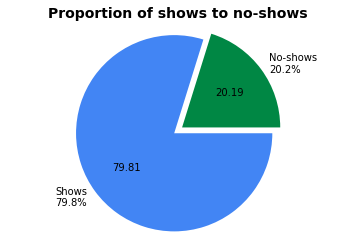

In [219]:
# Visualisation, as this is a simple binary question, a simple pie chart should provide a telling image:
labels = 'No-shows\n20.2%', 'Shows\n79.8%'
data = [0.201933, 0.798067]
clr = ['#008744','#4285f4']
explosion = [0.1,0]
figureObject, axesObject = plt.subplots()
axesObject.pie(data,labels=labels,autopct='%1.2f',colors=clr,startangle=0,explode=explosion)
axesObject.axis('equal')
plt.title('Proportion of shows to no-shows', fontsize=14, fontweight='bold')
plt.show()

### Answer 1
This quicklook analysis shows that in the data set provided, there are **not 30%** of no-shows but **20.2%**. It is not clear why the claim of 30% no shows was made on the [source page](https://www.kaggle.com/joniarroba/noshowappointments) of the project.
<br>That said, a fifth of patients missing their appointments is still high, so the following questions remain of interest.
<br>
*N.B.: Different methods are shown to learn more than one approach to solving the same problem.*

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 2 - Investigate any temporal patterns affecting no-shows

Do any temporal patterns exist that allow better planning for medical practises ? Are there more absences on any given day of the week for example ?

In [220]:
# Add a column indicating day of week of appointment - check it has been added correctly with df.head()
df_noshow['Appointment_weekday'] = df_noshow['AppointmentDay'].dt.weekday_name
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,repeat_patients,repeat_noshows,Appointment_weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False,False,False,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False,False,False,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False,False,False,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False,False,False,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False,False,False,Friday


In [221]:
# Get counts for Shows(False) and No-shows(True) by day of week
No_show_counts = df_noshow.groupby(['Appointment_weekday','No-show']).count()
No_show_counts

PatientID  AppointmentID  Gender  ScheduledDay  \
Appointment_weekday No-show                                                   
Friday              False        14982          14982   14982         14982   
                    True          4037           4037    4037          4037   
Monday              False        18025          18025   18025         18025   
                    True          4690           4690    4690          4690   
Saturday            False           30             30      30            30   
                    True             9              9       9             9   
Thursday            False        13909          13909   13909         13909   
                    True          3338           3338    3338          3338   
Tuesday             False        20488          20488   20488         20488   
                    True          5152           5152    5152          5152   
Wednesday           False        20774          20774   20774         20774   
                    True          5093           5093    5093          5093   

                             AppointmentDay    Age  Neighbourhood  \
Appointment_weekday No-show                                         
Friday              False             14982  14982          14982   
                    True               4037   4037           4037   
Monday              False             18025  18025          18025   
                    True               4690   4690           4690   
Saturday            False                30     30             30   
                    True                  9      9              9   
Thursday            False             13909  13909          13909   
                    True               3338   3338           3338   
Tuesday             False             20488  20488          20488   
                    True               5152   5152           5152   
Wednesday           False             20774  20774          20774   
                    True               5093   5093           5093   

                             Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_weekday No-show                                                    
Friday              False          14982         14982     14982       14982   
                    True            4037          4037      4037        4037   
Monday              False          18025         18025     18025       18025   
                    True            4690          4690      4690        4690   
Saturday            False             30            30        30          30   
                    True               9             9         9           9   
Thursday            False          13909         13909     13909       13909   
                    True            3338          3338      3338        3338   
Tuesday             False          20488         20488     20488       20488   
                    True            5152          5152      5152        5152   
Wednesday           False          20774         20774     20774       20774   
                    True            5093          5093      5093        5093   

                             Handicap  SMS_received  repeat_patients  \
Appointment_weekday No-show                                            
Friday              False       14982         14982            14982   
                    True         4037          4037             4037   
Monday              False       18025         18025            18025   
                    True         4690          4690             4690   
Saturday            False          30            30               30   
                    True            9             9                9   
Thursday            False       13909         13909            13909   
                    True         3338          3338             3338   
Tuesday             False       20488         20488            20488   
                    True         5152     

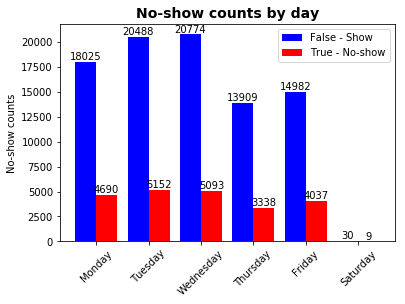

In [222]:
# Plot results in bar chart
N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
# here the values are hard coded because there are only 6, and example with a function is shown below
day_false_counts = (18025, 20488, 20774, 13909, 14982, 30)
records1 = ax.bar(ind, day_false_counts, width, color='blue')

# here the values are hard coded because there are only 6, and example with a function is shown below
day_true_counts = (4690, 5152, 5093, 3338, 4037, 9)
records2 = ax.bar(ind + width, day_true_counts, width, color='red')

# add some text for labels, title and axes ticks
ax.set_title('No-show counts by day', fontsize=14, fontweight='bold')
ax.set_ylabel('No-show counts')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), rotation=45)
ax.legend((records1[0], records2[0]), ('False - Show', 'True - No-show'))

def autolabel(records):
    """
    Attach a text label above each bar displaying its height
    """
    for record in records:
        height = record.get_height()
        ax.text(record.get_x() + record.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(records1)
autolabel(records2)

plt.show()

The plot above shows the absolute values for shows and no-shows as a function of day of week.
Now to investigate whether there is a trend in absences as a function of day of week, let us look at the ratio of shows to no-shows by day:

In [223]:
## Ratio of shows to no-shows by day of week

# define new Python function that will be called with the dataframe created above
def true_to_false_ratio(df):
    # create a new column with NaN values to begin
    df['True/False_ratio'] = np.NaN
    # pick a column to work with (all columns in df above have same values)
    column = 'PatientID'
    # define list of weekdays to iterate through
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    for day in days:
        # check that a value exists (no appointments are made on Sundays)
        if (np.isnan(df[column][day][True])):
            # print('T_F_Ratio = NaN')
            df['True/False_ratio'][day][True] = np.NaN
            df['True/False_ratio'][day][False] = np.NaN
        # perfom calculation and set result in new column
        else:
            T_F_Ratio = df[column][day][True] / df[column][day][False]
            # print('T_F_Ratio = ' + str(T_F_Ratio))
            df['True/False_ratio'][day][True] = T_F_Ratio
            df['True/False_ratio'][day][False] = T_F_Ratio
        
true_to_false_ratio(No_show_counts)
# display df to check operations ran correctly
No_show_counts


PatientID  AppointmentID  Gender  ScheduledDay  \
Appointment_weekday No-show                                                   
Friday              False        14982          14982   14982         14982   
                    True          4037           4037    4037          4037   
Monday              False        18025          18025   18025         18025   
                    True          4690           4690    4690          4690   
Saturday            False           30             30      30            30   
                    True             9              9       9             9   
Thursday            False        13909          13909   13909         13909   
                    True          3338           3338    3338          3338   
Tuesday             False        20488          20488   20488         20488   
                    True          5152           5152    5152          5152   
Wednesday           False        20774          20774   20774         20774   
                    True          5093           5093    5093          5093   

                             AppointmentDay    Age  Neighbourhood  \
Appointment_weekday No-show                                         
Friday              False             14982  14982          14982   
                    True               4037   4037           4037   
Monday              False             18025  18025          18025   
                    True               4690   4690           4690   
Saturday            False                30     30             30   
                    True                  9      9              9   
Thursday            False             13909  13909          13909   
                    True               3338   3338           3338   
Tuesday             False             20488  20488          20488   
                    True               5152   5152           5152   
Wednesday           False             20774  20774          20774   
                    True               5093   5093           5093   

                             Scholarship  Hypertension  Diabetes  Alcoholism  \
Appointment_weekday No-show                                                    
Friday              False          14982         14982     14982       14982   
                    True            4037          4037      4037        4037   
Monday              False          18025         18025     18025       18025   
                    True            4690          4690      4690        4690   
Saturday            False             30            30        30          30   
                    True               9             9         9           9   
Thursday            False          13909         13909     13909       13909   
                    True            3338          3338      3338        3338   
Tuesday             False          20488         20488     20488       20488   
                    True            5152          5152      5152        5152   
Wednesday           False          20774         20774     20774       20774   
                    True            5093          5093      5093        5093   

                             Handicap  SMS_received  repeat_patients  \
Appointment_weekday No-show                                            
Friday              False       14982         14982            14982   
                    True         4037          4037             4037   
Monday              False       18025         18025            18025   
                    True         4690          4690             4690   
Saturday            False          30            30               30   
                    True            9             9                9   
Thursday            False       13909         13909            13909   
                    True         3338          3338             3338   
Tuesday             False       20488         20488            20488   
                    True         5152     

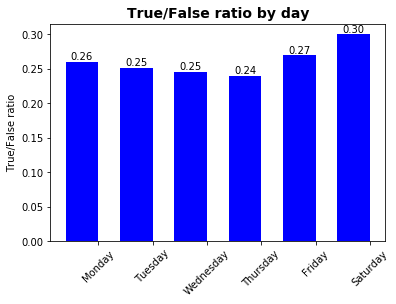

In [224]:
# Plot results in bar chart
N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.6       # the width of the bars

fig, ax = plt.subplots()
# load true false ratios from dataframe
# this could be hard coded as there are only 6 values, 
# but this example is written and shown in case there were more
True_False_ratio = []
def get_true_false_ratios(df):
    column = 'True/False_ratio'
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    for day in days:
        True_False_ratio.append(df[column][day][True])
get_true_false_ratios(No_show_counts)

rects1 = ax.bar(ind, True_False_ratio, width, color='blue')

# add some text for labels, title and axes ticks
ax.set_title('True/False ratio by day', fontsize=14, fontweight='bold')
ax.set_ylabel('True/False ratio')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), rotation=45)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

The plot above shows that there is a small variation in absences as a function of day of the week. However it must be noted that this **is only exploratory analysis**, indeed to push this analysis further and perhaps be able to answer the initial question with confidence, more work would need to be done.
<br>
For example but not limited to the following:
<ul>
<li>Does this weekly pattern repeat in different months ?</li>
<li>Is the variation observed here (for instance 0.24 to 0.3 range in no-shows to shows ratio) significant relative to the total number of appointements ?</li>
<li>Is this pattern typical irrespective of location ?</li>
</ul>
Clearly this is really just scratching the surface of the original question: are there any temporal variations in no-shows?

### Answer 2
This quicklook analysis tentatively indicates that there *are some variations as a function of day of week*. **However**, it is not possible from the current analysis to determine whether the variations are statistically significant, either in terms of a week-by-week view, nor as a function of total number of appointments on a day or in a week.
Some pathways to pursue to investigate this further might include data normalisation, comparisons to larger-scale cycles such as months or seasons or time series analysis.

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 3 - Does a pre-existing medical condition predispose a patient to missing an appointment ?

Investigate any correlation between the medical conditions the patients have and their likelihood of missing an appointment.

In [225]:
# display df.head() again to see the medical conditions
df_noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,repeat_patients,repeat_noshows,Appointment_weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,False,False,False,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,False,False,False,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,False,False,False,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,False,False,False,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,False,False,False,Friday


In [242]:
# get count of people with and without medical condition who missed their appointment
count_split = df_noshow.groupby(['No-show','Hypertension','Diabetes','Alcoholism','Handicap']).count()
count_split

PatientID  AppointmentID  \
No-show Hypertension Diabetes Alcoholism Handicap                             
False   False        False    False      False         66512          66512   
                                         True            962            962   
                              True       False          1506           1506   
                                         True             31             31   
                     True     False      False          1068           1068   
                                         True             37             37   
                              True       False            63             63   
        True         False    False      False         11338          11338   
                                         True            473            473   
                              True       False           845            845   
                                         True             28             28   
                     True     False      False          4841           4841   
                                         True            294            294   
                              True       False           201            201   
                                         True              9              9   
True    False        False    False      False         17603          17603   
                                         True            235            235   
                              True       False           416            416   
                                         True              4              4   
                     True     False      False           273            273   
                                         True              3              3   
                              True       False            12             12   
                                         True              1              1   
        True         False    False      False          2325           2325   
                                         True            108            108   
                              True       False           197            197   
                                         True              1              1   
                     True     False      False          1044           1044   
                                         True             51             51   
                              True       False            42             42   
                                         True              4              4   

                                                   Gender  ScheduledDay  \
No-show Hypertension Diabetes Alcoholism Handicap                         
False   False        False    False      False      66512         66512   
                                         True         962           962   
                              True       False       1506          1506   
                                         True          31            31   
                     True     False      False       1068          1068   
                                         True          37            37   
                              True       False         63            63   
        True         False    False      False      11338         11338   
                                         True         473           473   
                              True       False        845           845   
                                         True          28            28   
                     True     False      False       4841          4841   
                                         True         294           294   
                              True       False        201           201   
                                         True           9             9   
True    False        False    False      False      17603         17603   
                                         True         235           235   
                  

In [241]:
# check that count sums to all rows - should equal 110527
sum_check = count_split['PatientID'].sum()
sum_check

110527

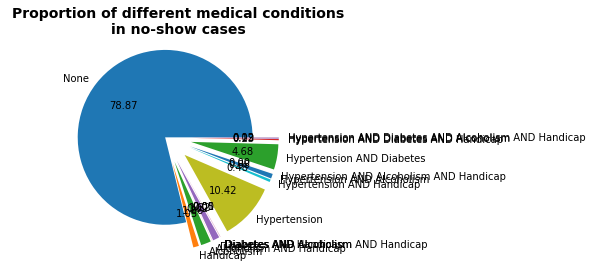

In [277]:
# Visualisation using a pie chart:
labels = 'Hypertension','Diabetes','Alcoholism','Handicap'
labels = 'None','Handicap','Alcoholism','Alcoholism AND Handicap','Diabetes','Diabetes AND Handicap','Diabetes AND Alcoholism','Diabetes AND Alcoholism AND Handicap','Hypertension','Hypertension AND Handicap','Hypertension AND Alcoholism','Hypertension AND Alcoholism AND Handicap','Hypertension AND Diabetes','Hypertension AND Diabetes AND Handicap','Hypertension AND Diabetes AND Alcoholism','Hypertension AND Diabetes AND Alcoholism AND Handicap'
data = [17603,235,416,4,273,3,12,1,2325,108,197,1,1044,51,42,4]
#clr = ['#008744','#4285f4']
explosion = [0,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
figureObject, axesObject = plt.subplots()
#axesObject.pie(data,labels=labels,autopct='%1.2f',colors=clr,startangle=0,explode=explosion)
axesObject.pie(data,labels=labels,autopct='%1.2f',startangle=0,explode=explosion)
axesObject.axis('equal')
plt.title('Proportion of different medical conditions\nin no-show cases', fontsize=14, fontweight='bold')
plt.show()

In [362]:
# then get proportions of each and plot eitehr as bar chart or perhaps as pie chart
# percentage of each medical condition for no-shows vs shows: two pie charts, one for no-show on for show. showing
# percentage of each medical condition

# check if patientID duplicates exist! new question

### Answer 3


<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 4 - Do some hospitals see a greater proportion of no-shows than others ?

Does the neighbourhood - which may be a very loose proxy for social-economic level of the patients - have any impact on their showing up or not ?

### Answer 4


<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 5 - Does the number of sms messages sent have a quantifiable impact on no-shows ?

Because sending sms reminders to patients takes time, energy and has a cost, is there a number of messages needed to ensure patients show-up ? Is there a number of sms messages beyond which patients never show up anyway ?

### Answer 5


<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 6 - Does gender have an impact on appointment attendance ?

### Answer 6

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 7 - What is the proportion of repeat no-show patients ?

How many patients have missed more that one appointment ?

### Answer 7


<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="250" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

### Question 8 - When is an sms message sent out to a patient, is it systematic ?

Does the patient always receive a minimum of 1 (one) sms notification before an appointment ?

### Answer 8


In [ ]:
# End of Exploratory Data Analysis

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="650" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [ ]:
# End of Conclusions

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="650" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>

<a id='references'></a>
## References
<ol>
<li>https://matplotlib.org</li>
<li>https://pandas.pydata.org/</li>
<li>https://stackoverflow.com/</li>
<li>https://docs.scipy.org/doc/</li>
<li>ref_x</li>
</ol>

In [ ]:
# End of References

<a href="http://mariafresa.net/clipart/horizontal-line-clipart.html" title="Image from mariafresa.net"><img src="http://mariafresa.net/data_gallery/horizontal-line-clipart-Zg61u9-clipart_8164.gif" width="650" alt="Horizontal Line Clipart Zg61u9 Clipart_8164" /></a>